# メトロポリス・ヘイスティングス法

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import choice
from scipy import integrate

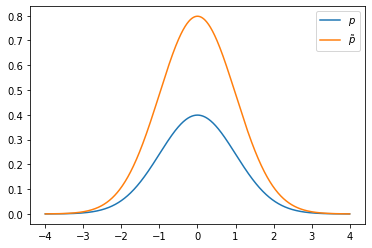

In [2]:
# [-4,4]の1000個のデータ
n_samples=1000
x=np.linspace(-4, 4,n_samples)

norm=stats.norm(loc=0, scale=1)

# 正規化定数,
Z_p=2
# p(z),gauss
def childa_p(z):
    return norm.pdf(z)*Z_p

# p(z),正規化された値，サンプリングできない
p_data=childa_p(x)/Z_p
plt.plot(x,p_data,label='$p$')

# サンプリング可能な~p(z)
childa_p_data=childa_p(x)
plt.plot(x,childa_p_data,label='$\~p$')

# q(z),一様分布
# q_data = np.linspace(0.1, 0.1, 1000)
# plt.plot(x,q_data,label='$q$')

plt.legend()
plt.show()

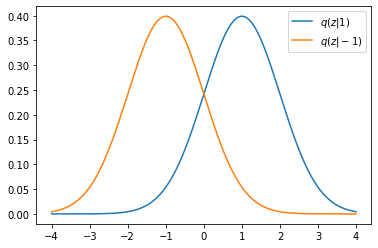

In [3]:
def q(z,zc):
    # zc状態のもとでの分布q(z|zc),平均zcのガンマ分布
    return stats.norm(loc=zc, scale=1).pdf(z)

plt.plot(x,q(x,1),label='$q(z|1)$')
plt.plot(x,q(x,-1),label='$q(z|-1)$')
plt.legend()

In [4]:
def sampling_q(previous):
    # q(x|previous)分布に従い[-4,4]の乱数生成
    while True:
        # 一様に生成した[-4,4]の乱数zをq(z|previous)の確率で取得
        z=np.random.uniform(-4, 4)
        if q(z,previous)>=np.random.uniform(0, 1):
            return z
sampling_q(0)

0.2711704614888788

In [5]:
def sampling(previous):
    '''
    メトロポリス・ヘイスティングス法
    qが左右対象のため,正確にはメトロポリス法
    :param previous:
    :return: candidate 
    '''
    while True:
        # previousを平均としたガウス分布qからサンプル取得
        candidate=sampling_q(previous)
        # 受理するまでサンプル候補をとる
        if childa_p(candidate)/childa_p(previous) > np.random.uniform(0, 1):
            return candidate
sampling(0)

0.03654416370424407

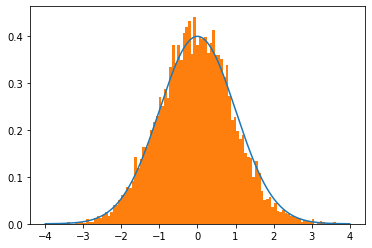

In [6]:
# サンプル数
N = 1000
#初期値
sample=0
samples=[]
for i in range(N):
    sample = sampling(sample)
    samples.append(sample)
plt.plot(x, p_data)
plt.hist(samples, bins=100,density=True)
plt.show()# 棄却サンプリングの実験

In [6]:
integrate

